# **Preprocessing**

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Class Proportions:
diabetes: 513 non_diabetes: 502


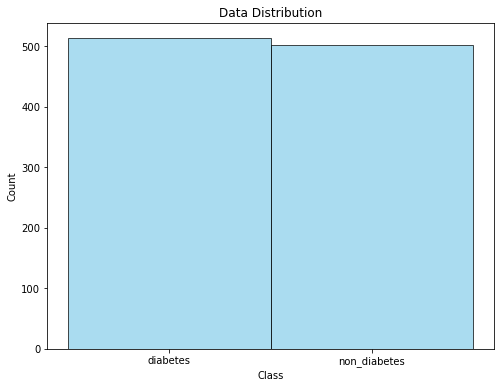

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/lab5/Desktop/tongue_diabetes_new"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['diabetes', 'non_diabetes']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'diabetes' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("diabetes:", np.sum(labels == 0), "non_diabetes:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


# Equal amount of data is taken

In [4]:
# Separate data for Normal and Tuberculosis classes
diabetes_images = images[labels == 0][:500]
non_diabetes_images = images[labels == 1][:500]
diabetes_labels = labels[labels == 0][:500]
non_diabetes_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([diabetes_images, non_diabetes_images])
balanced_labels = np.concatenate([diabetes_labels, non_diabetes_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("diabetes_images:",diabetes_images.shape)
print("non_diabetes_images:",non_diabetes_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
diabetes_images: (500, 224, 224)
non_diabetes_images: (500, 224, 224)
X_train shape: (800, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (800,)
y_test shape: (200,)


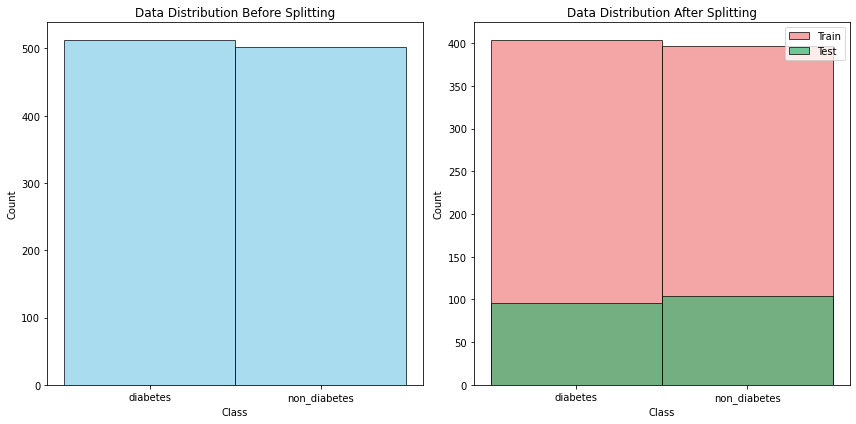

In [5]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# Plot histogram for class distribution after splitting
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


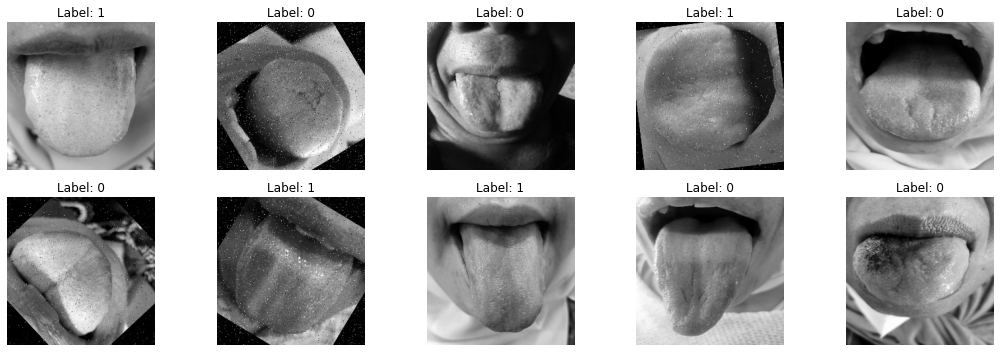

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [7]:
images[0]

array([[0.40392157, 0.40392157, 0.4       , ..., 0.5764706 , 0.5764706 ,
        0.5803922 ],
       [0.38431373, 0.38431373, 0.3764706 , ..., 0.58431375, 0.5803922 ,
        0.5764706 ],
       [0.38431373, 0.3764706 , 0.3647059 , ..., 0.5764706 , 0.5686275 ,
        0.56078434],
       ...,
       [0.11764706, 0.09411765, 0.09411765, ..., 0.3647059 , 0.36862746,
        0.34901962],
       [0.13333334, 0.10588235, 0.09803922, ..., 0.3764706 , 0.38431373,
        0.3647059 ],
       [0.14901961, 0.11372549, 0.10588235, ..., 0.38039216, 0.38431373,
        0.36862746]], dtype=float32)

Yes, you can add other layers or modify the architecture of the custom classification head in various ways, depending on the specific requirements of your task. Here are some common modifications:

1. **Dropout Layers**: Adding dropout layers can help prevent overfitting. Dropout layers randomly set a fraction of input units to 0 at each update during training, which helps prevent overfitting.

   Example:
   ```python
   x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
   ```

2. **Batch Normalization**: Batch normalization normalizes the input layer by adjusting and scaling the activations. It can help with faster convergence and better generalization.

   Example:
   ```python
   x = BatchNormalization()(x)
   ```

3. **Additional Dense Layers**: Adding more dense layers can increase the model's capacity to learn complex patterns in the data. However, adding too many layers can lead to overfitting.

   Example:
   ```python
   x = Dense(256, activation='relu')(x)
   ```

4. **Different Activation Functions**: You can experiment with different activation functions in the dense layers. Common choices include `sigmoid`, `tanh`, and `relu`.

   Example:
   ```python
   x = Dense(512, activation='tanh')(x)
   ```

5. **Regularization**: You can add regularization to the dense layers to prevent overfitting. Common regularization techniques include L1 regularization, L2 regularization, and dropout.

   Example:
   ```python
   from tensorflow.keras import regularizers
   x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
   ```

These modifications can be added to the custom classification head after the `GlobalAveragePooling2D` layer to customize the model according to your needs. The choice of layers and their configurations should be based on the specific requirements of your task and the characteristics of your dataset.

# OverFitting  and UnderFitting Identification


Overfitting occurs when a machine learning model learns the training data too well, to the point that it negatively impacts its performance on unseen data. To identify overfitting, you can use several techniques:

1. **Validation Curve**: Plot the training and validation accuracies or losses against the number of epochs. If the training accuracy keeps increasing while the validation accuracy stagnates or starts decreasing, it indicates overfitting.

2. **Learning Curve**: Plot the training and validation accuracies or losses against the size of the training dataset. If the training and validation curves converge at a low error, the model is underfitting. If they diverge, the model may be overfitting.

3. **Validation Set Performance**: Evaluate the model on a separate validation set during training. If the validation accuracy starts to decrease while the training accuracy keeps increasing, the model is likely overfitting.

4. **Regularization Techniques**: Regularization techniques like L1 and L2 regularization, dropout, and early stopping can help prevent overfitting. If you observe a significant improvement in performance with these techniques, it indicates that overfitting was present.

5. **Cross-Validation**: Use k-fold cross-validation to assess the model's performance on different subsets of the data. If the model performs significantly better on the training data compared to the validation data, it suggests overfitting.

6. **Model Complexity**: If you have control over the model architecture, reducing the complexity (e.g., number of layers, number of units per layer) can help prevent overfitting.

7. **Data Augmentation**: If applicable, augmenting the training data can help improve the model's generalization performance by exposing it to more variations in the data.

By monitoring these indicators, you can identify and mitigate overfitting in your machine learning models.

# RESNET50(A) + Dense Layers (B):

2024-03-24 09:43:40.578309: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 09:43:40.579506: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 09:43:40.638411: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 09:43:40.867789: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 09:43:41.460489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 921ms/step - accuracy: 0.5227 - auc: 0.4912 - auc_1: 0.4698 - false_negatives: 89.0000 - false_positives: 120.0385 - loss: 5.0606 - precision: 0.5001 - recall: 0.6177 - true_negatives: 102.3846 - true_positives: 119.3462 - val_accuracy: 0.4800 - val_auc: 0.8124 - val_auc_1: 0.8347 - val_false_negatives: 104.0000 - val_false_positives: 0.0000e+00 - val_loss: 2.1307 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_negatives: 96.0000 - val_true_positives: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 922ms/step - accuracy: 0.5292 - auc: 0.6021 - auc_1: 0.6305 - false_negatives: 100.8462 - false_positives: 97.2692 - loss: 1.1623 - precision: 0.4708 - recall: 0.4631 - true_negatives: 125.1538 - true_positives: 107.5000 - val_accuracy: 0.7150 - val_auc: 0.8288 - val_auc_1: 0.8465 - val_false_negatives: 40.0000 - val_false_positives: 17.0000 - val_loss: 0.5474 - val_precision: 0

Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 928ms/step - accuracy: 0.8467 - auc: 0.9422 - auc_1: 0.9302 - false_negatives: 33.7308 - false_positives: 32.1154 - loss: 0.3142 - precision: 0.8475 - recall: 0.8293 - true_negatives: 190.3077 - true_positives: 174.6154 - val_accuracy: 0.7750 - val_auc: 0.8719 - val_auc_1: 0.8688 - val_false_negatives: 31.0000 - val_false_positives: 14.0000 - val_loss: 0.4740 - val_precision: 0.8391 - val_recall: 0.7019 - val_true_negatives: 82.0000 - val_true_positives: 73.0000
Epoch 17/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 928ms/step - accuracy: 0.8629 - auc: 0.9452 - auc_1: 0.9328 - false_negatives: 33.2308 - false_positives: 27.1538 - loss: 0.3063 - precision: 0.8820 - recall: 0.8268 - true_negatives: 195.2692 - true_positives: 175.1154 - val_accuracy: 0.7850 - val_auc: 0.8740 - val_auc_1: 0.8703 - val_false_negatives: 29.0000 - val_false_positives: 14.0000 - val_loss: 0.4716 - val_precision: 0.8427 - val_recall: 0.7212 - val_true_negatives: 82.0000 - val_true

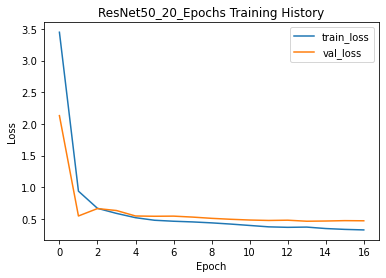

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with ResNet50 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 968ms/step - accuracy: 0.4899 - auc_2: 0.4819 - auc_3: 0.4548 - false_negatives_1: 95.5385 - false_positives_1: 126.0000 - loss: 5.3092 - precision_1: 0.4699 - recall_1: 0.5748 - true_negatives_1: 96.4231 - true_positives_1: 112.8077 - val_accuracy: 0.5000 - val_auc_2: 0.8121 - val_auc_3: 0.8300 - val_false_negatives_1: 100.0000 - val_false_positives_1: 0.0000e+00 - val_loss: 0.6725 - val_precision_1: 1.0000 - val_recall_1: 0.0385 - val_true_negatives_1: 96.0000 - val_true_positives_1: 4.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 926ms/step - accuracy: 0.5124 - auc_2: 0.6361 - auc_3: 0.6373 - false_negatives_1: 102.3846 - false_positives_1: 98.7692 - loss: 0.8850 - precision_1: 0.4742 - recall_1: 0.4710 - true_negatives_1: 123.6538 - true_positives_1: 105.9615 - val_accuracy: 0.5000 - val_auc_2: 0.8242 - val_auc_3: 0.8412 - val_false_negatives_1: 100.0000 - val_false_positives_1: 0.0000e+00 - val_loss: 0.7192 - val_precision_1: 1.0000 - val

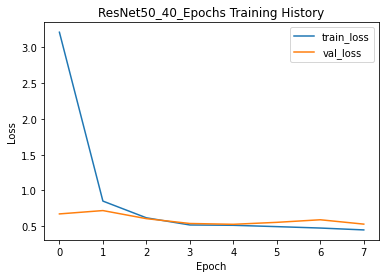

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with ResNet50 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 974ms/step - accuracy: 0.4695 - auc_4: 0.4916 - auc_5: 0.4651 - false_negatives_2: 111.1538 - false_positives_2: 108.9615 - loss: 7.1406 - precision_2: 0.4259 - recall_2: 0.4235 - true_negatives_2: 113.4615 - true_positives_2: 97.1923 - val_accuracy: 0.5200 - val_auc_4: 0.8262 - val_auc_5: 0.8357 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 96.0000 - val_loss: 0.9824 - val_precision_2: 0.5200 - val_recall_2: 1.0000 - val_true_negatives_2: 0.0000e+00 - val_true_positives_2: 104.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 929ms/step - accuracy: 0.5284 - auc_4: 0.5909 - auc_5: 0.5622 - false_negatives_2: 86.4231 - false_positives_2: 113.5000 - loss: 0.9054 - precision_2: 0.5062 - recall_2: 0.6220 - true_negatives_2: 108.9231 - true_positives_2: 121.9231 - val_accuracy: 0.4800 - val_auc_4: 0.8282 - val_auc_5: 0.8483 - val_false_negatives_2: 104.0000 - val_false_positives_2: 0.0000e+00 - val_loss: 0.6519 - val_precision_2: 0.0000e

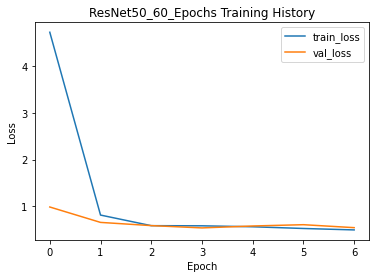

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with ResNet50 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 988ms/step - accuracy: 0.4665 - auc_6: 0.4835 - auc_7: 0.4640 - false_negatives_3: 111.3077 - false_positives_3: 110.8462 - loss: 7.1841 - precision_3: 0.4230 - recall_3: 0.4231 - true_negatives_3: 111.5769 - true_positives_3: 97.0385 - val_accuracy: 0.5200 - val_auc_6: 0.8195 - val_auc_7: 0.8419 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 96.0000 - val_loss: 0.9474 - val_precision_3: 0.5200 - val_recall_3: 1.0000 - val_true_negatives_3: 0.0000e+00 - val_true_positives_3: 104.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 947ms/step - accuracy: 0.5256 - auc_6: 0.5901 - auc_7: 0.5585 - false_negatives_3: 88.7692 - false_positives_3: 113.0769 - loss: 0.9526 - precision_3: 0.5038 - recall_3: 0.6142 - true_negatives_3: 109.3462 - true_positives_3: 119.5769 - val_accuracy: 0.4800 - val_auc_6: 0.8178 - val_auc_7: 0.8382 - val_false_negatives_3: 104.0000 - val_false_positives_3: 0.0000e+00 - val_loss: 0.6822 - val_precision_3: 0.0000e

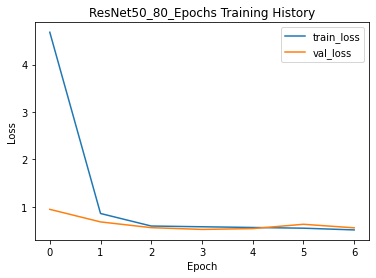

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with ResNet50 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 971ms/step - accuracy: 0.4615 - auc_8: 0.4717 - auc_9: 0.4613 - false_negatives_4: 126.6154 - false_positives_4: 100.0385 - loss: 5.6762 - precision_4: 0.4042 - recall_4: 0.3445 - true_negatives_4: 122.3846 - true_positives_4: 81.7308 - val_accuracy: 0.4800 - val_auc_8: 0.5288 - val_auc_9: 0.5843 - val_false_negatives_4: 104.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 2.9420 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_true_negatives_4: 96.0000 - val_true_positives_4: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 931ms/step - accuracy: 0.5306 - auc_8: 0.5765 - auc_9: 0.5665 - false_negatives_4: 100.1538 - false_positives_4: 91.3077 - loss: 1.5073 - precision_4: 0.4493 - recall_4: 0.4271 - true_negatives_4: 131.1154 - true_positives_4: 108.1923 - val_accuracy: 0.6700 - val_auc_8: 0.8282 - val_auc_9: 0.8456 - val_false_negatives_4: 62.0000 - val_false_positives_4: 4.0000 - val_loss: 0.5994 - val_precision_4: 0.

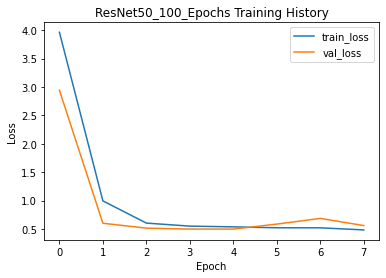

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with ResNet50 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50_100_Epochs Training History")
plt.show()


In [13]:
num_training_records = X_train_resized.shape[0]
print("Number of training records:", num_training_records)


Number of training records: 800


# Resnet50+Dropout+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 984ms/step - accuracy: 0.4844 - auc_10: 0.4873 - auc_11: 0.4723 - false_negatives_5: 109.7308 - false_positives_5: 109.9231 - loss: 10.0275 - precision_5: 0.4728 - recall_5: 0.4599 - true_negatives_5: 112.5000 - true_positives_5: 98.6154 - val_accuracy: 0.4800 - val_auc_10: 0.8181 - val_auc_11: 0.8383 - val_false_negatives_5: 104.0000 - val_false_positives_5: 0.0000e+00 - val_loss: 0.7070 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_true_negatives_5: 96.0000 - val_true_positives_5: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 943ms/step - accuracy: 0.6028 - auc_10: 0.6549 - auc_11: 0.6349 - false_negatives_5: 79.9615 - false_positives_5: 85.9615 - loss: 0.7141 - precision_5: 0.5893 - recall_5: 0.5857 - true_negatives_5: 136.4615 - true_positives_5: 128.3846 - val_accuracy: 0.4800 - val_auc_10: 0.8204 - val_auc_11: 0.8416 - val_false_negatives_5: 104.0000 - val_false_positives_5: 0.0000e+00 - val_loss: 0.6567 - val_prec

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 946ms/step - accuracy: 0.6882 - auc_10: 0.7695 - auc_11: 0.7678 - false_negatives_5: 53.6538 - false_positives_5: 82.4231 - loss: 0.5688 - precision_5: 0.6616 - recall_5: 0.7199 - true_negatives_5: 140.0000 - true_positives_5: 154.6923 - val_accuracy: 0.6800 - val_auc_10: 0.8342 - val_auc_11: 0.8466 - val_false_negatives_5: 59.0000 - val_false_positives_5: 5.0000 - val_loss: 0.5918 - val_precision_5: 0.9000 - val_recall_5: 0.4327 - val_true_negatives_5: 91.0000 - val_true_positives_5: 45.0000
Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 941ms/step - accuracy: 0.6760 - auc_10: 0.7430 - auc_11: 0.6919 - false_negatives_5: 62.9615 - false_positives_5: 73.5769 - loss: 0.6001 - precision_5: 0.6547 - recall_5: 0.6803 - true_negatives_5: 148.8462 - true_positives_5: 145.3846 - val_accuracy: 0.5650 - val_auc_10: 0.8372 - val_auc_11: 0.8524 - val_false_negatives_5: 87.0000 - val_false_positives_5: 0.0000e+00 - val_loss: 0.6109 - val_precision_5: 1.0000 - val_recall_

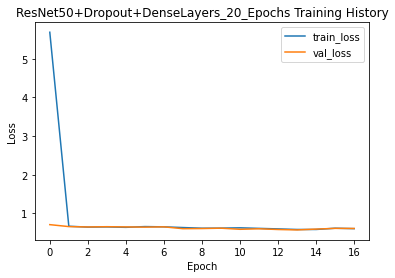

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'ResNet50+DROPOUT+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DROPOUT+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+Dropout+DenseLayers_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 979ms/step - accuracy: 0.4814 - auc_12: 0.4879 - auc_13: 0.4673 - false_negatives_6: 112.5769 - false_positives_6: 106.0000 - loss: 12.9899 - precision_6: 0.4621 - recall_6: 0.4437 - true_negatives_6: 116.4231 - true_positives_6: 95.7692 - val_accuracy: 0.4800 - val_auc_12: 0.5573 - val_auc_13: 0.6211 - val_false_negatives_6: 104.0000 - val_false_positives_6: 0.0000e+00 - val_loss: 3.1315 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_true_negatives_6: 96.0000 - val_true_positives_6: 0.0000e+00
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 945ms/step - accuracy: 0.5691 - auc_12: 0.5902 - auc_13: 0.5690 - false_negatives_6: 105.5769 - false_positives_6: 77.9231 - loss: 2.0232 - precision_6: 0.5879 - recall_6: 0.4259 - true_negatives_6: 144.5000 - true_positives_6: 102.7692 - val_accuracy: 0.5250 - val_auc_12: 0.8149 - val_auc_13: 0.8302 - val_false_negatives_6: 95.0000 - val_false_positives_6: 0.0000e+00 - val_loss: 0.6311 - val_prec

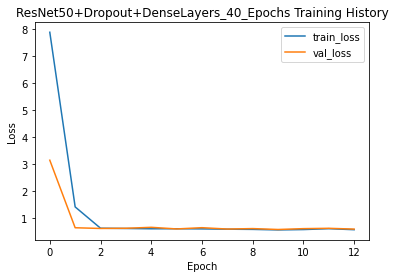

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'ResNet50+DROPOUT+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DROPOUT+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+Dropout+DenseLayers_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 970ms/step - accuracy: 0.4966 - auc_14: 0.5090 - auc_15: 0.4792 - false_negatives_7: 107.1154 - false_positives_7: 103.6923 - loss: 8.5183 - precision_7: 0.4793 - recall_7: 0.4767 - true_negatives_7: 118.7308 - true_positives_7: 101.2308 - val_accuracy: 0.4800 - val_auc_14: 0.8051 - val_auc_15: 0.8247 - val_false_negatives_7: 104.0000 - val_false_positives_7: 0.0000e+00 - val_loss: 1.2471 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_true_negatives_7: 96.0000 - val_true_positives_7: 0.0000e+00
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 933ms/step - accuracy: 0.5578 - auc_14: 0.5786 - auc_15: 0.5670 - false_negatives_7: 103.4615 - false_positives_7: 83.5000 - loss: 0.8018 - precision_7: 0.5731 - recall_7: 0.4442 - true_negatives_7: 138.9231 - true_positives_7: 104.8846 - val_accuracy: 0.7350 - val_auc_14: 0.8178 - val_auc_15: 0.8411 - val_false_negatives_7: 36.0000 - val_false_positives_7: 17.0000 - val_loss: 0.6463 - val_precisi

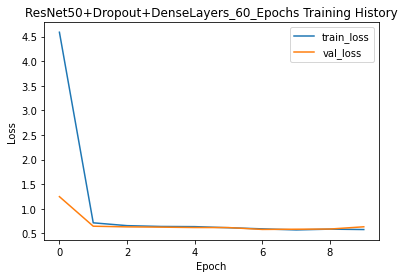

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'ResNet50+DROPOUT+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DROPOUT+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+Dropout+DenseLayers_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 968ms/step - accuracy: 0.5133 - auc_16: 0.5047 - auc_17: 0.4781 - false_negatives_8: 105.4615 - false_positives_8: 100.5385 - loss: 10.7000 - precision_8: 0.4965 - recall_8: 0.4793 - true_negatives_8: 121.8846 - true_positives_8: 102.8846 - val_accuracy: 0.4800 - val_auc_16: 0.7920 - val_auc_17: 0.8093 - val_false_negatives_8: 104.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 1.5498 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_true_negatives_8: 96.0000 - val_true_positives_8: 0.0000e+00
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 930ms/step - accuracy: 0.5926 - auc_16: 0.6289 - auc_17: 0.6192 - false_negatives_8: 88.1154 - false_positives_8: 83.8846 - loss: 1.0638 - precision_8: 0.6013 - recall_8: 0.5190 - true_negatives_8: 138.5385 - true_positives_8: 120.2308 - val_accuracy: 0.6250 - val_auc_16: 0.8228 - val_auc_17: 0.8418 - val_false_negatives_8: 73.0000 - val_false_positives_8: 2.0000 - val_loss: 0.6321 - val_precisio

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 928ms/step - accuracy: 0.6769 - auc_16: 0.7740 - auc_17: 0.7297 - false_negatives_8: 74.5769 - false_positives_8: 55.8846 - loss: 0.5934 - precision_8: 0.6976 - recall_8: 0.5825 - true_negatives_8: 166.5385 - true_positives_8: 133.7692 - val_accuracy: 0.5750 - val_auc_16: 0.8401 - val_auc_17: 0.8547 - val_false_negatives_8: 85.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 0.6050 - val_precision_8: 1.0000 - val_recall_8: 0.1827 - val_true_negatives_8: 96.0000 - val_true_positives_8: 19.0000
Epoch 16/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 930ms/step - accuracy: 0.6495 - auc_16: 0.7750 - auc_17: 0.6909 - false_negatives_8: 96.6154 - false_positives_8: 49.7692 - loss: 0.5895 - precision_8: 0.7016 - recall_8: 0.4745 - true_negatives_8: 172.6538 - true_positives_8: 111.7308 - val_accuracy: 0.7650 - val_auc_16: 0.8130 - val_auc_17: 0.7746 - val_false_negatives_8: 25.0000 - val_false_positives_8: 22.0000 - val_loss: 0.6183 - val_precision_8: 0.7822 - val_recall

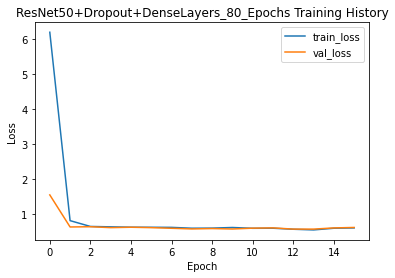

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'ResNet50+DROPOUT+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DROPOUT+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+Dropout+DenseLayers_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 969ms/step - accuracy: 0.5808 - auc_18: 0.5682 - auc_19: 0.5281 - false_negatives_9: 92.4615 - false_positives_9: 93.5385 - loss: 5.2818 - precision_9: 0.5604 - recall_9: 0.5682 - true_negatives_9: 128.8846 - true_positives_9: 115.8846 - val_accuracy: 0.4800 - val_auc_18: 0.7597 - val_auc_19: 0.8173 - val_false_negatives_9: 104.0000 - val_false_positives_9: 0.0000e+00 - val_loss: 2.3224 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_true_negatives_9: 96.0000 - val_true_positives_9: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 929ms/step - accuracy: 0.5971 - auc_18: 0.6228 - auc_19: 0.5736 - false_negatives_9: 88.6538 - false_positives_9: 78.1923 - loss: 2.1931 - precision_9: 0.6017 - recall_9: 0.5195 - true_negatives_9: 144.2308 - true_positives_9: 119.6923 - val_accuracy: 0.7350 - val_auc_18: 0.8288 - val_auc_19: 0.8459 - val_false_negatives_9: 19.0000 - val_false_positives_9: 34.0000 - val_loss: 0.5349 - val_precisio

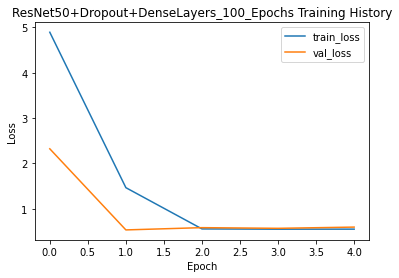

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'ResNet50+DROPOUT+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+DROPOUT+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+Dropout+DenseLayers_100_Epochs Training History")
plt.show()


# Resnet50+GAP2D+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 716ms/step - accuracy: 0.5114 - auc_30: 0.4883 - auc_31: 0.4779 - false_negatives_15: 103.6154 - false_positives_15: 104.5000 - loss: 0.9551 - precision_15: 0.4921 - recall_15: 0.4954 - true_negatives_15: 117.9231 - true_positives_15: 104.7308 - val_accuracy: 0.4800 - val_auc_30: 0.8085 - val_auc_31: 0.8310 - val_false_negatives_15: 104.0000 - val_false_positives_15: 0.0000e+00 - val_loss: 0.6768 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - val_true_negatives_15: 96.0000 - val_true_positives_15: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - accuracy: 0.5750 - auc_30: 0.5791 - auc_31: 0.5578 - false_negatives_15: 114.6154 - false_positives_15: 70.9615 - loss: 0.7236 - precision_15: 0.5925 - recall_15: 0.3936 - true_negatives_15: 151.4615 - true_positives_15: 93.7308 - val_accuracy: 0.4900 - val_auc_30: 0.8055 - val_auc_31: 0.8279 - val_false_negatives_15: 102.0000 - val_false_positives_15: 0.0000e+00 - val_los

Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 697ms/step - accuracy: 0.7199 - auc_30: 0.8003 - auc_31: 0.7857 - false_negatives_15: 72.8077 - false_positives_15: 49.1538 - loss: 0.5639 - precision_15: 0.7686 - recall_15: 0.6078 - true_negatives_15: 173.2692 - true_positives_15: 135.5385 - val_accuracy: 0.7500 - val_auc_30: 0.8151 - val_auc_31: 0.8347 - val_false_negatives_15: 31.0000 - val_false_positives_15: 19.0000 - val_loss: 0.5625 - val_precision_15: 0.7935 - val_recall_15: 0.7019 - val_true_negatives_15: 77.0000 - val_true_positives_15: 73.0000
Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 699ms/step - accuracy: 0.7274 - auc_30: 0.7898 - auc_31: 0.7422 - false_negatives_15: 64.1538 - false_positives_15: 53.1923 - loss: 0.5662 - precision_15: 0.7447 - recall_15: 0.6582 - true_negatives_15: 169.2308 - true_positives_15: 144.1923 - val_accuracy: 0.7250 - val_auc_30: 0.8157 - val_auc_31: 0.8350 - val_false_negatives_15: 37.0000 - val_false_positives_15: 18.0000 - val_loss: 0.5612 - val_pre

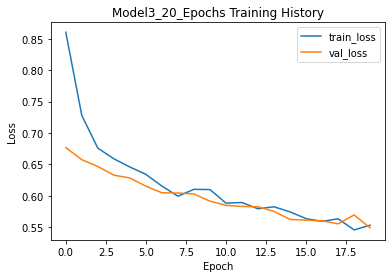

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+GLOBALAVGPOOL+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+GLOBALAVGPOOL+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model3_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 727ms/step - accuracy: 0.4730 - auc_22: 0.4777 - auc_23: 0.4538 - false_negatives_11: 112.8846 - false_positives_11: 106.3846 - loss: 0.9701 - precision_11: 0.4510 - recall_11: 0.4298 - true_negatives_11: 116.0385 - true_positives_11: 95.4615 - val_accuracy: 0.6450 - val_auc_22: 0.7757 - val_auc_23: 0.7921 - val_false_negatives_11: 10.0000 - val_false_positives_11: 61.0000 - val_loss: 0.6751 - val_precision_11: 0.6065 - val_recall_11: 0.9038 - val_true_negatives_11: 35.0000 - val_true_positives_11: 94.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 687ms/step - accuracy: 0.5716 - auc_22: 0.5730 - auc_23: 0.5445 - false_negatives_11: 111.6923 - false_positives_11: 77.8846 - loss: 0.7134 - precision_11: 0.5683 - recall_11: 0.4436 - true_negatives_11: 144.5385 - true_positives_11: 96.6538 - val_accuracy: 0.4800 - val_auc_22: 0.7945 - val_auc_23: 0.8116 - val_false_negatives_11: 104.0000 - val_false_positives_11: 0.0000e+00 - val_loss: 0.6769 - val_

Epoch 15/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 686ms/step - accuracy: 0.6958 - auc_22: 0.7900 - auc_23: 0.7785 - false_negatives_11: 73.3462 - false_positives_11: 56.5769 - loss: 0.5663 - precision_11: 0.7218 - recall_11: 0.6032 - true_negatives_11: 165.8462 - true_positives_11: 135.0000 - val_accuracy: 0.7450 - val_auc_22: 0.8160 - val_auc_23: 0.8349 - val_false_negatives_11: 30.0000 - val_false_positives_11: 21.0000 - val_loss: 0.5648 - val_precision_11: 0.7789 - val_recall_11: 0.7115 - val_true_negatives_11: 75.0000 - val_true_positives_11: 74.0000
Epoch 16/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 687ms/step - accuracy: 0.7289 - auc_22: 0.7957 - auc_23: 0.7808 - false_negatives_11: 66.6923 - false_positives_11: 51.2308 - loss: 0.5611 - precision_11: 0.7599 - recall_11: 0.6424 - true_negatives_11: 171.1923 - true_positives_11: 141.6538 - val_accuracy: 0.7450 - val_auc_22: 0.8153 - val_auc_23: 0.8348 - val_false_negatives_11: 32.0000 - val_false_positives_11: 19.0000 - val_loss: 0.5618 - val_pre

Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 25.
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.8032 - auc_22: 0.8598 - auc_23: 0.8797 - false_negatives_11: 16.7500 - false_positives_11: 12.5000 - loss: 0.5098 - precision_11: 0.8390 - recall_11: 0.7825 - true_negatives_11: 50.5000 - true_positives_11: 54.2500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 565ms/step
Model Details:
Model: ResNet50+GLOBALAVGPOOL+DENSE20
Epochs: 40
Test Accuracy: 0.7599999904632568
Test Loss: 0.5378486514091492
Validation Accuracy: 0.7200000286102295
Validation Loss: 0.5566356778144836
Precision: 0.7857142857142857
Recall: 0.7403846153846154
AUC-ROC: 0.7608173076923077
AUC-PR: 0.8305494505494505
True Negatives: 0.7857142686843872
False Positives: 0.7403846383094788
False Negatives: 75.0
True Positives: 77.0
Error Rate: 0.5004
F1 Score: 0.7623762376237625
Cohen's Kappa: 0.5203836930455635
Matthews Correlation Coefficient: 0.5213214153471422
Balanced Accuracy: 0.7608173076923077
Time 

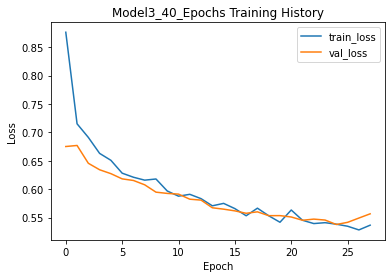

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+GLOBALAVGPOOL+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+GLOBALAVGPOOL+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model3_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 741ms/step - accuracy: 0.4551 - auc_24: 0.4915 - auc_25: 0.4627 - false_negatives_12: 116.6923 - false_positives_12: 118.0385 - loss: 0.9241 - precision_12: 0.4339 - recall_12: 0.4491 - true_negatives_12: 104.3846 - true_positives_12: 91.6538 - val_accuracy: 0.4800 - val_auc_24: 0.7888 - val_auc_25: 0.8031 - val_false_negatives_12: 104.0000 - val_false_positives_12: 0.0000e+00 - val_loss: 0.7240 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_true_negatives_12: 96.0000 - val_true_positives_12: 0.0000e+00
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 688ms/step - accuracy: 0.5406 - auc_24: 0.5516 - auc_25: 0.5372 - false_negatives_12: 121.6538 - false_positives_12: 74.7308 - loss: 0.7700 - precision_12: 0.5378 - recall_12: 0.3302 - true_negatives_12: 147.6923 - true_positives_12: 86.6923 - val_accuracy: 0.7250 - val_auc_24: 0.7989 - val_auc_25: 0.8153 - val_false_negatives_12: 18.0000 - val_false_positives_12: 37.0000 - val_loss: 0.

Epoch 15/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 688ms/step - accuracy: 0.6941 - auc_24: 0.7887 - auc_25: 0.7734 - false_negatives_12: 81.5000 - false_positives_12: 49.3846 - loss: 0.5703 - precision_12: 0.7404 - recall_12: 0.5597 - true_negatives_12: 173.0385 - true_positives_12: 126.8462 - val_accuracy: 0.7100 - val_auc_24: 0.8153 - val_auc_25: 0.8348 - val_false_negatives_12: 42.0000 - val_false_positives_12: 16.0000 - val_loss: 0.5712 - val_precision_12: 0.7949 - val_recall_12: 0.5962 - val_true_negatives_12: 80.0000 - val_true_positives_12: 62.0000
Epoch 16/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 687ms/step - accuracy: 0.7020 - auc_24: 0.7784 - auc_25: 0.7552 - false_negatives_12: 79.1538 - false_positives_12: 48.5385 - loss: 0.5834 - precision_12: 0.7605 - recall_12: 0.5644 - true_negatives_12: 173.8846 - true_positives_12: 129.1923 - val_accuracy: 0.7400 - val_auc_24: 0.8157 - val_auc_25: 0.8348 - val_false_negatives_12: 30.0000 - val_false_positives_12: 22.0000 - val_loss: 0.5596 - val_pre

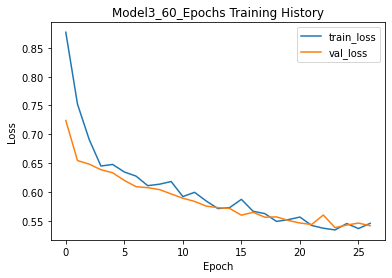

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+GLOBALAVGPOOL+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+GLOBALAVGPOOL+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model3_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 732ms/step - accuracy: 0.5338 - auc_32: 0.5549 - auc_33: 0.5102 - false_negatives_16: 102.6154 - false_positives_16: 98.2692 - loss: 0.8322 - precision_16: 0.5116 - recall_16: 0.5075 - true_negatives_16: 124.1538 - true_positives_16: 105.7308 - val_accuracy: 0.4800 - val_auc_32: 0.7815 - val_auc_33: 0.8012 - val_false_negatives_16: 104.0000 - val_false_positives_16: 0.0000e+00 - val_loss: 0.8163 - val_precision_16: 0.0000e+00 - val_recall_16: 0.0000e+00 - val_true_negatives_16: 96.0000 - val_true_positives_16: 0.0000e+00
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 690ms/step - accuracy: 0.5506 - auc_32: 0.5861 - auc_33: 0.5556 - false_negatives_16: 116.3077 - false_positives_16: 74.1154 - loss: 0.7456 - precision_16: 0.5908 - recall_16: 0.3600 - true_negatives_16: 148.3077 - true_positives_16: 92.0385 - val_accuracy: 0.4800 - val_auc_32: 0.7919 - val_auc_33: 0.8125 - val_false_negatives_16: 104.0000 - val_false_positives_16: 0.0000e+00 - val_loss

Epoch 15/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 689ms/step - accuracy: 0.7143 - auc_32: 0.8006 - auc_33: 0.7965 - false_negatives_16: 73.4231 - false_positives_16: 50.4615 - loss: 0.5589 - precision_16: 0.7574 - recall_16: 0.6074 - true_negatives_16: 171.9615 - true_positives_16: 134.9231 - val_accuracy: 0.7350 - val_auc_32: 0.8167 - val_auc_33: 0.8369 - val_false_negatives_16: 33.0000 - val_false_positives_16: 20.0000 - val_loss: 0.5580 - val_precision_16: 0.7802 - val_recall_16: 0.6827 - val_true_negatives_16: 76.0000 - val_true_positives_16: 71.0000
Epoch 16/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 688ms/step - accuracy: 0.7285 - auc_32: 0.7946 - auc_33: 0.7870 - false_negatives_16: 67.6923 - false_positives_16: 48.0385 - loss: 0.5636 - precision_16: 0.7645 - recall_16: 0.6341 - true_negatives_16: 174.3846 - true_positives_16: 140.6538 - val_accuracy: 0.7400 - val_auc_32: 0.8152 - val_auc_33: 0.8355 - val_false_negatives_16: 32.0000 - val_false_positives_16: 20.0000 - val_loss: 0.5613 - val_pre

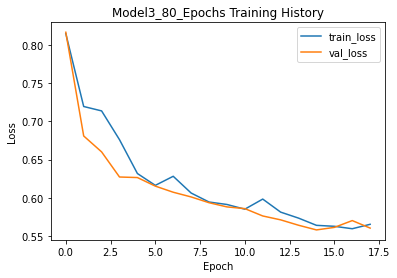

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+GLOBALAVGPOOL+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+GLOBALAVGPOOL+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model3_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 727ms/step - accuracy: 0.5231 - auc_34: 0.5154 - auc_35: 0.4652 - false_negatives_17: 103.8846 - false_positives_17: 103.5000 - loss: 0.8619 - precision_17: 0.5004 - recall_17: 0.5085 - true_negatives_17: 118.9231 - true_positives_17: 104.4615 - val_accuracy: 0.4800 - val_auc_34: 0.7958 - val_auc_35: 0.8110 - val_false_negatives_17: 104.0000 - val_false_positives_17: 0.0000e+00 - val_loss: 0.7232 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00 - val_true_negatives_17: 96.0000 - val_true_positives_17: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 689ms/step - accuracy: 0.5457 - auc_34: 0.5956 - auc_35: 0.5713 - false_negatives_17: 113.7308 - false_positives_17: 80.9615 - loss: 0.7190 - precision_17: 0.5455 - recall_17: 0.3794 - true_negatives_17: 141.4615 - true_positives_17: 94.6154 - val_accuracy: 0.4800 - val_auc_34: 0.8023 - val_auc_35: 0.8187 - val_false_negatives_17: 104.0000 - val_false_positives_17: 0.0000e+00 - val_l

Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 689ms/step - accuracy: 0.7310 - auc_34: 0.8027 - auc_35: 0.7797 - false_negatives_17: 71.8462 - false_positives_17: 44.8077 - loss: 0.5612 - precision_17: 0.7850 - recall_17: 0.6145 - true_negatives_17: 177.6154 - true_positives_17: 136.5000 - val_accuracy: 0.7200 - val_auc_34: 0.8156 - val_auc_35: 0.8362 - val_false_negatives_17: 39.0000 - val_false_positives_17: 17.0000 - val_loss: 0.5646 - val_precision_17: 0.7927 - val_recall_17: 0.6250 - val_true_negatives_17: 79.0000 - val_true_positives_17: 65.0000
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 698ms/step - accuracy: 0.7230 - auc_34: 0.7960 - auc_35: 0.7900 - false_negatives_17: 71.0000 - false_positives_17: 49.6538 - loss: 0.5641 - precision_17: 0.7712 - recall_17: 0.6168 - true_negatives_17: 172.7692 - true_positives_17: 137.3462 - val_accuracy: 0.7200 - val_auc_34: 0.8162 - val_auc_35: 0.8356 - val_false_negatives_17: 39.0000 - val_false_positives_17: 17.0000 - val_loss: 0.5626 - val_p

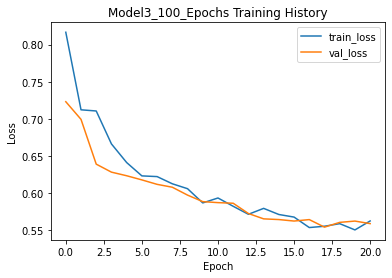

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+GLOBALAVGPOOL+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+GLOBALAVGPOOL+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model3_100_Epochs Training History")
plt.show()


# resnet50+conv2D+GAP2D+Dropout+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 743ms/step - accuracy: 0.4713 - auc_36: 0.4656 - auc_37: 0.4452 - false_negatives_18: 125.8846 - false_positives_18: 96.3462 - loss: 0.8360 - precision_18: 0.4210 - recall_18: 0.3579 - true_negatives_18: 126.0769 - true_positives_18: 82.4615 - val_accuracy: 0.5200 - val_auc_36: 0.5099 - val_auc_37: 0.5259 - val_false_negatives_18: 0.0000e+00 - val_false_positives_18: 96.0000 - val_loss: 0.7001 - val_precision_18: 0.5200 - val_recall_18: 1.0000 - val_true_negatives_18: 0.0000e+00 - val_true_positives_18: 104.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 704ms/step - accuracy: 0.4938 - auc_36: 0.5156 - auc_37: 0.5073 - false_negatives_18: 69.0000 - false_positives_18: 148.6923 - loss: 0.6944 - precision_18: 0.4829 - recall_18: 0.7431 - true_negatives_18: 73.7308 - true_positives_18: 139.3462 - val_accuracy: 0.5200 - val_auc_36: 0.5000 - val_auc_37: 0.5200 - val_false_negatives_18: 0.0000e+00 - val_false_positives_18: 96.0000 - val_loss: 0.6937 -

25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 705ms/step - accuracy: 0.5189 - auc_36: 0.5000 - auc_37: 0.4811 - false_negatives_18: 208.3462 - false_positives_18: 0.0000e+00 - loss: 0.6930 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00 - true_negatives_18: 222.4231 - true_positives_18: 0.0000e+00 - val_accuracy: 0.4800 - val_auc_36: 0.5000 - val_auc_37: 0.5200 - val_false_negatives_18: 104.0000 - val_false_positives_18: 0.0000e+00 - val_loss: 0.6930 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_true_negatives_18: 96.0000 - val_true_positives_18: 0.0000e+00
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 704ms/step - accuracy: 0.5189 - auc_36: 0.5000 - auc_37: 0.4811 - false_negatives_18: 208.3462 - false_positives_18: 0.0000e+00 - loss: 0.6930 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00 - true_negatives_18: 222.4231 - true_positives_18: 0.0000e+00 - val_accuracy: 0.4800 - val_auc_36: 0.5000 - val_auc_37: 0.5200 - val_false_negatives_18: 104.0000 - val_false_positives_18: 0.00

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packa

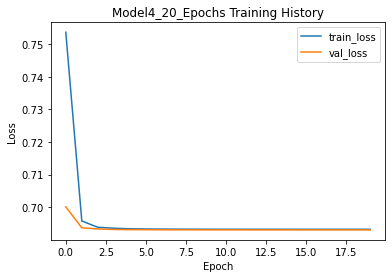

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with ResNet50 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+Conv2D+GLOBALAVGPOOL+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 730ms/step - accuracy: 0.5193 - auc_38: 0.4765 - auc_39: 0.4463 - false_negatives_19: 102.2692 - false_positives_19: 105.5000 - loss: 0.9157 - precision_19: 0.4980 - recall_19: 0.5414 - true_negatives_19: 116.9231 - true_positives_19: 106.0769 - val_accuracy: 0.5200 - val_auc_38: 0.5000 - val_auc_39: 0.5200 - val_false_negatives_19: 0.0000e+00 - val_false_positives_19: 96.0000 - val_loss: 0.6933 - val_precision_19: 0.5200 - val_recall_19: 1.0000 - val_true_negatives_19: 0.0000e+00 - val_true_positives_19: 104.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 695ms/step - accuracy: 0.4951 - auc_38: 0.4858 - auc_39: 0.4720 - false_negatives_19: 174.8846 - false_positives_19: 43.9615 - loss: 0.6940 - precision_19: 0.4380 - recall_19: 0.2664 - true_negatives_19: 178.4615 - true_positives_19: 33.4615 - val_accuracy: 0.4800 - val_auc_38: 0.5000 - val_auc_39: 0.5200 - val_false_negatives_19: 104.0000 - val_false_positives_19: 0.0000e+00 - val_loss: 0.693

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packa

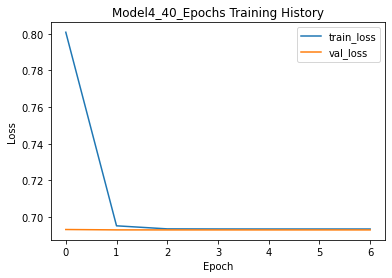

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with ResNet50 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+Conv2D+GLOBALAVGPOOL+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.5062 - auc_40: 0.5309 - auc_41: 0.5125 - false_negatives_20: 103.5000 - false_positives_20: 108.8846 - loss: 0.8597 - precision_20: 0.4812 - recall_20: 0.5153 - true_negatives_20: 113.5385 - true_positives_20: 104.8462 - val_accuracy: 0.5200 - val_auc_40: 0.6564 - val_auc_41: 0.6995 - val_false_negatives_20: 0.0000e+00 - val_false_positives_20: 96.0000 - val_loss: 0.6924 - val_precision_20: 0.5200 - val_recall_20: 1.0000 - val_true_negatives_20: 0.0000e+00 - val_true_positives_20: 104.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 696ms/step - accuracy: 0.5001 - auc_40: 0.4906 - auc_41: 0.4858 - false_negatives_20: 168.4231 - false_positives_20: 48.8846 - loss: 0.6940 - precision_20: 0.4551 - recall_20: 0.3136 - true_negatives_20: 173.5385 - true_positives_20: 39.9231 - val_accuracy: 0.5200 - val_auc_40: 0.5000 - val_auc_41: 0.5200 - val_false_negatives_20: 0.0000e+00 - val_false_positives_20: 96.0000 - val_loss: 0.6931

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


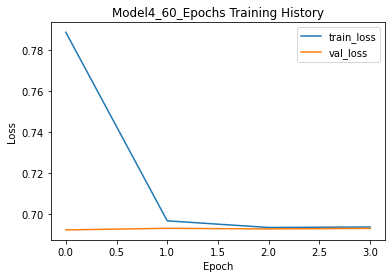

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with ResNet50 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+Conv2D+GLOBALAVGPOOL+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 732ms/step - accuracy: 0.4841 - auc_42: 0.4859 - auc_43: 0.4549 - false_negatives_21: 126.2692 - false_positives_21: 88.9615 - loss: 0.8265 - precision_21: 0.4696 - recall_21: 0.3527 - true_negatives_21: 133.4615 - true_positives_21: 82.0769 - val_accuracy: 0.5200 - val_auc_42: 0.7239 - val_auc_43: 0.6936 - val_false_negatives_21: 0.0000e+00 - val_false_positives_21: 96.0000 - val_loss: 0.6918 - val_precision_21: 0.5200 - val_recall_21: 1.0000 - val_true_negatives_21: 0.0000e+00 - val_true_positives_21: 104.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 702ms/step - accuracy: 0.5022 - auc_42: 0.5083 - auc_43: 0.4991 - false_negatives_21: 97.7692 - false_positives_21: 113.6154 - loss: 0.6927 - precision_21: 0.4809 - recall_21: 0.5187 - true_negatives_21: 108.8077 - true_positives_21: 110.5769 - val_accuracy: 0.5200 - val_auc_42: 0.5853 - val_auc_43: 0.5677 - val_false_negatives_21: 0.0000e+00 - val_false_positives_21: 96.0000 - val_loss: 0.6935 

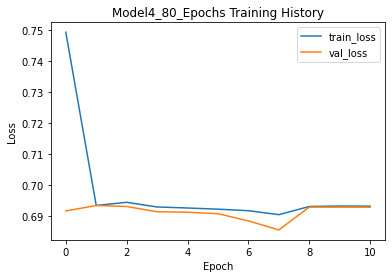

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with ResNet50 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+Conv2D+GLOBALAVGPOOL+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 732ms/step - accuracy: 0.5225 - auc_44: 0.5118 - auc_45: 0.4928 - false_negatives_22: 103.7692 - false_positives_22: 101.7692 - loss: 0.8389 - precision_22: 0.5005 - recall_22: 0.5112 - true_negatives_22: 120.6538 - true_positives_22: 104.5769 - val_accuracy: 0.5200 - val_auc_44: 0.5974 - val_auc_45: 0.5816 - val_false_negatives_22: 0.0000e+00 - val_false_positives_22: 96.0000 - val_loss: 0.6948 - val_precision_22: 0.5200 - val_recall_22: 1.0000 - val_true_negatives_22: 0.0000e+00 - val_true_positives_22: 104.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 694ms/step - accuracy: 0.4819 - auc_44: 0.4976 - auc_45: 0.4948 - false_negatives_22: 105.6923 - false_positives_22: 119.3846 - loss: 0.6950 - precision_22: 0.4681 - recall_22: 0.6393 - true_negatives_22: 103.0385 - true_positives_22: 102.6538 - val_accuracy: 0.4800 - val_auc_44: 0.5000 - val_auc_45: 0.5200 - val_false_negatives_22: 104.0000 - val_false_positives_22: 0.0000e+00 - val_loss: 0

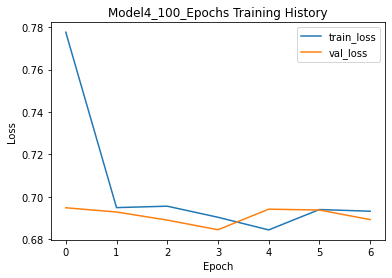

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with ResNet50 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+Conv2D+GLOBALAVGPOOL+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_100_Epochs Training History")
plt.show()


# resnet50+LSTM+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4299 - auc_46: 0.4365 - auc_47: 0.4350 - false_negatives_23: 64.8462 - false_positives_23: 175.2692 - loss: 0.9256 - precision_23: 0.4223 - recall_23: 0.6878 - true_negatives_23: 47.1538 - true_positives_23: 143.5000 - val_accuracy: 0.4800 - val_auc_46: 0.5000 - val_auc_47: 0.5200 - val_false_negatives_23: 104.0000 - val_false_positives_23: 0.0000e+00 - val_loss: 0.6980 - val_precision_23: 0.0000e+00 - val_recall_23: 0.0000e+00 - val_true_negatives_23: 96.0000 - val_true_positives_23: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 967ms/step - accuracy: 0.5176 - auc_46: 0.4821 - auc_47: 0.4757 - false_negatives_23: 200.2308 - false_positives_23: 9.1154 - loss: 0.6943 - precision_23: 0.0917 - recall_23: 0.0210 - true_negatives_23: 213.3077 - true_positives_23: 8.1154 - val_accuracy: 0.5200 - val_auc_46: 0.5000 - val_auc_47: 0.5200 - val_false_negatives_23: 0.0000e+00 - val_false_positives_23: 96.0000 - val_loss: 0.697

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


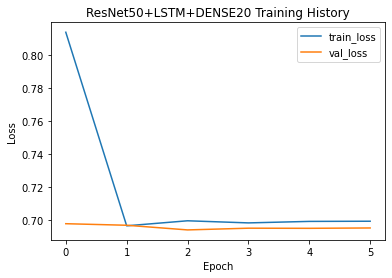

In [32]:
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
resnet_output = base_model(input_layer, training=False)
flatten = Flatten()(resnet_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+LSTM+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+LSTM+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+LSTM+DENSE20 Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4573 - auc_48: 0.4380 - auc_49: 0.4349 - false_negatives_24: 71.8077 - false_positives_24: 166.2308 - loss: 0.9283 - precision_24: 0.4593 - recall_24: 0.7825 - true_negatives_24: 56.1923 - true_positives_24: 136.5385 - val_accuracy: 0.4800 - val_auc_48: 0.5000 - val_auc_49: 0.5200 - val_false_negatives_24: 104.0000 - val_false_positives_24: 0.0000e+00 - val_loss: 0.7010 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00 - val_true_negatives_24: 96.0000 - val_true_positives_24: 0.0000e+00
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 964ms/step - accuracy: 0.5252 - auc_48: 0.4969 - auc_49: 0.4842 - false_negatives_24: 184.6154 - false_positives_24: 19.3462 - loss: 0.6945 - precision_24: 0.1775 - recall_24: 0.0642 - true_negatives_24: 203.0769 - true_positives_24: 23.7308 - val_accuracy: 0.5200 - val_auc_48: 0.5000 - val_auc_49: 0.5200 - val_false_negatives_24: 0.0000e+00 - val_false_positives_24: 96.0000 - val_loss: 0.7

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


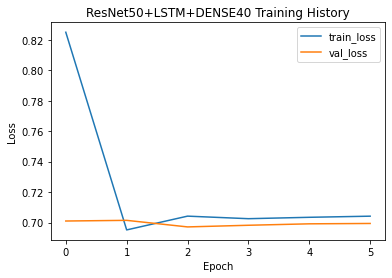

In [33]:
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
resnet_output = base_model(input_layer, training=False)
flatten = Flatten()(resnet_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+LSTM+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+LSTM+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+LSTM+DENSE40 Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4634 - auc_50: 0.4281 - auc_51: 0.4303 - false_negatives_25: 79.3077 - false_positives_25: 155.2692 - loss: 0.9514 - precision_25: 0.4615 - recall_25: 0.7554 - true_negatives_25: 67.1538 - true_positives_25: 129.0385 - val_accuracy: 0.4800 - val_auc_50: 0.5000 - val_auc_51: 0.5200 - val_false_negatives_25: 104.0000 - val_false_positives_25: 0.0000e+00 - val_loss: 0.6945 - val_precision_25: 0.0000e+00 - val_recall_25: 0.0000e+00 - val_true_negatives_25: 96.0000 - val_true_positives_25: 0.0000e+00
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 961ms/step - accuracy: 0.4679 - auc_50: 0.4573 - auc_51: 0.4536 - false_negatives_25: 98.0385 - false_positives_25: 133.3846 - loss: 0.6963 - precision_25: 0.3976 - recall_25: 0.4783 - true_negatives_25: 89.0385 - true_positives_25: 110.3077 - val_accuracy: 0.5200 - val_auc_50: 0.5000 - val_auc_51: 0.5200 - val_false_negatives_25: 0.0000e+00 - val_false_positives_25: 96.0000 - val_loss: 0.6

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packa

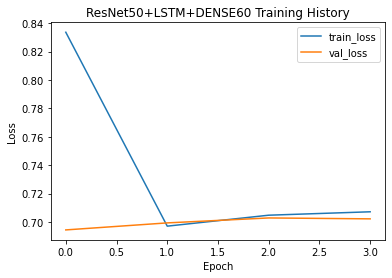

In [34]:
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
resnet_output = base_model(input_layer, training=False)
flatten = Flatten()(resnet_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+LSTM+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+LSTM+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+LSTM+DENSE60 Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4716 - auc_52: 0.4186 - auc_53: 0.4267 - false_negatives_26: 44.8462 - false_positives_26: 186.2692 - loss: 1.0247 - precision_26: 0.4732 - recall_26: 0.8725 - true_negatives_26: 36.1538 - true_positives_26: 163.5000 - val_accuracy: 0.4800 - val_auc_52: 0.5000 - val_auc_53: 0.5200 - val_false_negatives_26: 104.0000 - val_false_positives_26: 0.0000e+00 - val_loss: 0.6968 - val_precision_26: 0.0000e+00 - val_recall_26: 0.0000e+00 - val_true_negatives_26: 96.0000 - val_true_positives_26: 0.0000e+00
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 962ms/step - accuracy: 0.5208 - auc_52: 0.5031 - auc_53: 0.4862 - false_negatives_26: 191.0769 - false_positives_26: 15.9615 - loss: 0.6940 - precision_26: 0.1468 - recall_26: 0.0460 - true_negatives_26: 206.4615 - true_positives_26: 17.2692 - val_accuracy: 0.5200 - val_auc_52: 0.5000 - val_auc_53: 0.5200 - val_false_negatives_26: 0.0000e+00 - val_false_positives_26: 96.0000 - val_loss: 0.7

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


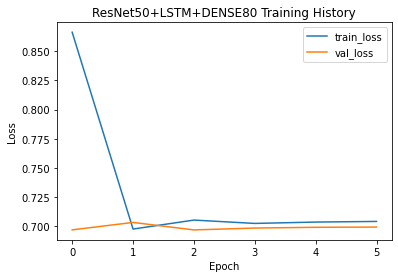

In [35]:
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
resnet_output = base_model(input_layer, training=False)
flatten = Flatten()(resnet_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+LSTM+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+LSTM+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+LSTM+DENSE80 Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4721 - auc_54: 0.4244 - auc_55: 0.4363 - false_negatives_27: 36.3846 - false_positives_27: 192.3462 - loss: 1.0910 - precision_27: 0.4748 - recall_27: 0.8986 - true_negatives_27: 30.0769 - true_positives_27: 171.9615 - val_accuracy: 0.4800 - val_auc_54: 0.5000 - val_auc_55: 0.5200 - val_false_negatives_27: 104.0000 - val_false_positives_27: 0.0000e+00 - val_loss: 0.7089 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00 - val_true_negatives_27: 96.0000 - val_true_positives_27: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 962ms/step - accuracy: 0.5208 - auc_54: 0.5162 - auc_55: 0.4946 - false_negatives_27: 191.0769 - false_positives_27: 15.9615 - loss: 0.6987 - precision_27: 0.1468 - recall_27: 0.0460 - true_negatives_27: 206.4615 - true_positives_27: 17.2692 - val_accuracy: 0.5200 - val_auc_54: 0.5000 - val_auc_55: 0.5200 - val_false_negatives_27: 0.0000e+00 - val_false_positives_27: 96.0000 - val_loss: 0

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


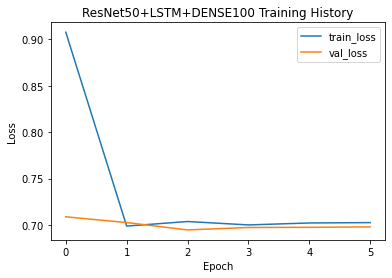

In [36]:
import numpy as np
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained ResNet50 model without top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
resnet_output = base_model(input_layer, training=False)
flatten = Flatten()(resnet_output)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'ResNet50+LSTM+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("ResNet50+LSTM+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50+LSTM+DENSE100 Training History")
plt.show()


# resnet50+GRU+Dense Layers

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 882ms/step - accuracy: 0.4985 - auc_56: 0.5203 - auc_57: 0.5483 - false_negatives_28: 94.6923 - false_positives_28: 120.2308 - loss: 0.7355 - precision_28: 0.5172 - recall_28: 0.5793 - true_negatives_28: 88.6923 - true_positives_28: 127.1538 - val_accuracy: 0.4800 - val_auc_56: 0.5000 - val_auc_57: 0.5200 - val_false_negatives_28: 104.0000 - val_false_positives_28: 0.0000e+00 - val_loss: 0.6973 - val_precision_28: 0.0000e+00 - val_recall_28: 0.0000e+00 - val_true_negatives_28: 96.0000 - val_true_positives_28: 0.0000e+00
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 888ms/step - accuracy: 0.5033 - auc_56: 0.5034 - auc_57: 0.5279 - false_negatives_28: 87.0000 - false_positives_28: 123.6154 - loss: 0.7003 - precision_28: 0.4642 - recall_28: 0.5413 - true_negatives_28: 85.3077 - true_positives_28: 134.8462 - val_accuracy: 0.4800 - val_auc_56: 0.5000 - val_auc_57: 0.5200 - val_false_negatives_28: 104.0000 - val_false_positives_28: 0.0000e+00 - val_loss:

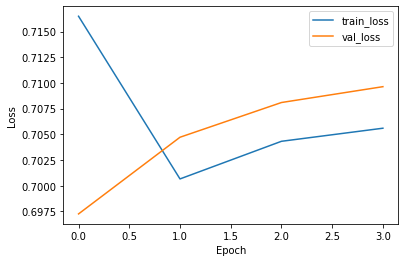

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.4602 - auc_56: 0.5000 - auc_57: 0.5398 - false_negatives_28: 71.0000 - false_positives_28: 0.0000e+00 - loss: 0.7064 - precision_28: 0.0000e+00 - recall_28: 0.0000e+00 - true_negatives_28: 63.0000 - true_positives_28: 0.0000e+00
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step
Model Details:
Model: ResNet50+GRU+DENSE
Epochs: 4
Test Accuracy: 0.47999998927116394
Test Loss: 0.6972554326057434
Validation Accuracy: 0.47999998927116394
Validation Loss: 0.7096360921859741
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
AUC-PR: 0.0
True Negatives: 96.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 0.0
Error Rate: 0.0
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 101.0311348438263


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


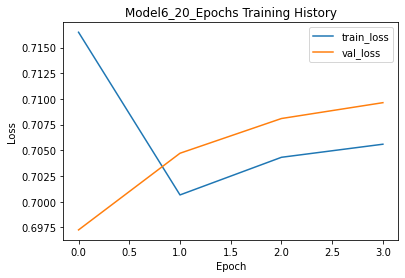

In [37]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained ResNet50 model without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    resnet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'ResNet50+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(20)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_20_Epochs Training History")
plt.show()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 950ms/step - accuracy: 0.5327 - auc_58: 0.5351 - auc_59: 0.5471 - false_negatives_29: 94.0000 - false_positives_29: 104.7692 - loss: 0.8501 - precision_29: 0.5276 - recall_29: 0.6155 - true_negatives_29: 104.1538 - true_positives_29: 127.8462 - val_accuracy: 0.4800 - val_auc_58: 0.5000 - val_auc_59: 0.5200 - val_false_negatives_29: 104.0000 - val_false_positives_29: 0.0000e+00 - val_loss: 0.6966 - val_precision_29: 0.0000e+00 - val_recall_29: 0.0000e+00 - val_true_negatives_29: 96.0000 - val_true_positives_29: 0.0000e+00
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 894ms/step - accuracy: 0.4879 - auc_58: 0.4899 - auc_59: 0.5082 - false_negatives_29: 81.4231 - false_positives_29: 136.5000 - loss: 0.6998 - precision_29: 0.4306 - recall_29: 0.5211 - true_negatives_29: 72.4231 - true_positives_29: 140.4231 - val_accuracy: 0.4800 - val_auc_58: 0.5000 - val_auc_59: 0.5200 - val_false_negatives_29: 104.0000 - val_false_positives_29: 0.0000e+00 - val_loss

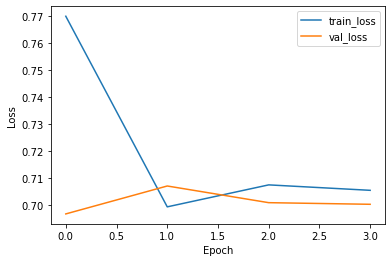

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.4602 - auc_58: 0.5000 - auc_59: 0.5398 - false_negatives_29: 71.0000 - false_positives_29: 0.0000e+00 - loss: 0.7052 - precision_29: 0.0000e+00 - recall_29: 0.0000e+00 - true_negatives_29: 63.0000 - true_positives_29: 0.0000e+00
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 618ms/step
Model Details:
Model: ResNet50+GRU+DENSE
Epochs: 4
Test Accuracy: 0.47999998927116394
Test Loss: 0.696632981300354
Validation Accuracy: 0.47999998927116394
Validation Loss: 0.7001978158950806
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
AUC-PR: 0.0
True Negatives: 96.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 0.0
Error Rate: 0.0
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 103.97954678535461


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


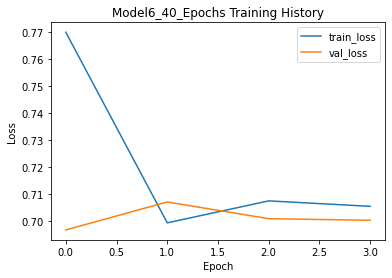

In [38]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained ResNet50 model without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    resnet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'ResNet50+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(40)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_40_Epochs Training History")
plt.show()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 957ms/step - accuracy: 0.5228 - auc_60: 0.5014 - auc_61: 0.5192 - false_negatives_30: 107.0769 - false_positives_30: 96.9231 - loss: 0.8203 - precision_30: 0.5217 - recall_30: 0.5681 - true_negatives_30: 112.0000 - true_positives_30: 114.7692 - val_accuracy: 0.4800 - val_auc_60: 0.5000 - val_auc_61: 0.5200 - val_false_negatives_30: 104.0000 - val_false_positives_30: 0.0000e+00 - val_loss: 0.6932 - val_precision_30: 0.0000e+00 - val_recall_30: 0.0000e+00 - val_true_negatives_30: 96.0000 - val_true_positives_30: 0.0000e+00
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.5014 - auc_60: 0.4935 - auc_61: 0.5127 - false_negatives_30: 74.6538 - false_positives_30: 137.1154 - loss: 0.6959 - precision_30: 0.4619 - recall_30: 0.5780 - true_negatives_30: 71.8077 - true_positives_30: 147.1923 - val_accuracy: 0.4800 - val_auc_60: 0.5000 - val_auc_61: 0.5200 - val_false_negatives_30: 104.0000 - val_false_positives_30: 0.0000e+00 - val_loss

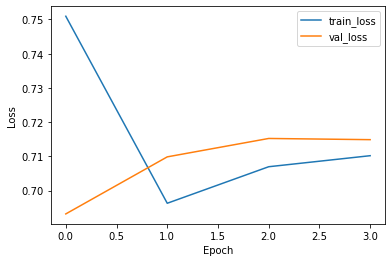

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.4602 - auc_60: 0.5000 - auc_61: 0.5398 - false_negatives_30: 71.0000 - false_positives_30: 0.0000e+00 - loss: 0.6962 - precision_30: 0.0000e+00 - recall_30: 0.0000e+00 - true_negatives_30: 63.0000 - true_positives_30: 0.0000e+00
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step
Model Details:
Model: ResNet50+GRU+DENSE
Epochs: 4
Test Accuracy: 0.47999998927116394
Test Loss: 0.6931642293930054
Validation Accuracy: 0.47999998927116394
Validation Loss: 0.7148714661598206
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
AUC-PR: 0.0
True Negatives: 96.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 0.0
Error Rate: 0.0
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 103.07584953308105


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


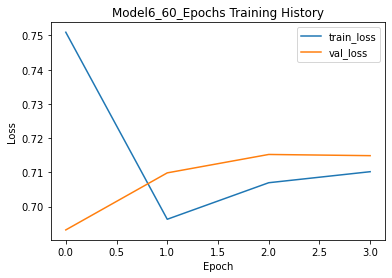

In [39]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained ResNet50 model without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    resnet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'ResNet50+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(60)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_60_Epochs Training History")
plt.show()


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 946ms/step - accuracy: 0.5325 - auc_62: 0.5091 - auc_63: 0.5365 - false_negatives_31: 82.9231 - false_positives_31: 114.3846 - loss: 0.9268 - precision_31: 0.5254 - recall_31: 0.6542 - true_negatives_31: 94.5385 - true_positives_31: 138.9231 - val_accuracy: 0.4800 - val_auc_62: 0.5000 - val_auc_63: 0.5200 - val_false_negatives_31: 104.0000 - val_false_positives_31: 0.0000e+00 - val_loss: 0.7028 - val_precision_31: 0.0000e+00 - val_recall_31: 0.0000e+00 - val_true_negatives_31: 96.0000 - val_true_positives_31: 0.0000e+00
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 903ms/step - accuracy: 0.4879 - auc_62: 0.4915 - auc_63: 0.5098 - false_negatives_31: 81.4231 - false_positives_31: 136.5000 - loss: 0.7049 - precision_31: 0.4306 - recall_31: 0.5211 - true_negatives_31: 72.4231 - true_positives_31: 140.4231 - val_accuracy: 0.4800 - val_auc_62: 0.5000 - val_auc_63: 0.5200 - val_false_negatives_31: 104.0000 - val_false_positives_31: 0.0000e+00 - val_loss:

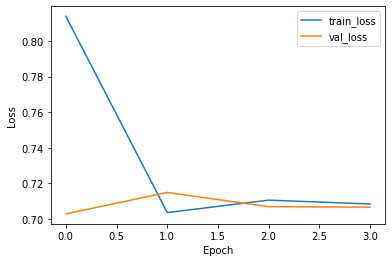

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.4602 - auc_62: 0.5000 - auc_63: 0.5398 - false_negatives_31: 71.0000 - false_positives_31: 0.0000e+00 - loss: 0.7160 - precision_31: 0.0000e+00 - recall_31: 0.0000e+00 - true_negatives_31: 63.0000 - true_positives_31: 0.0000e+00
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step
Model Details:
Model: ResNet50+GRU+DENSE
Epochs: 4
Test Accuracy: 0.47999998927116394
Test Loss: 0.7028018236160278
Validation Accuracy: 0.47999998927116394
Validation Loss: 0.706606924533844
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
AUC-PR: 0.0
True Negatives: 96.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 0.0
Error Rate: 0.0
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 103.11806988716125


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


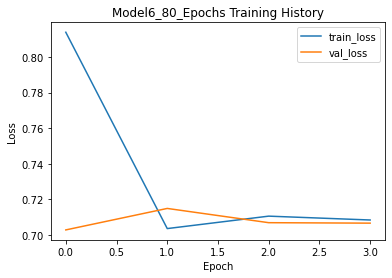

In [40]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained ResNet50 model without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    resnet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'ResNet50+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(80)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_80_Epochs Training History")
plt.show()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 950ms/step - accuracy: 0.4832 - auc_64: 0.4616 - auc_65: 0.5013 - false_negatives_32: 103.8846 - false_positives_32: 120.8077 - loss: 0.7294 - precision_32: 0.4865 - recall_32: 0.5296 - true_negatives_32: 88.1154 - true_positives_32: 117.9615 - val_accuracy: 0.4800 - val_auc_64: 0.5000 - val_auc_65: 0.5200 - val_false_negatives_32: 104.0000 - val_false_positives_32: 0.0000e+00 - val_loss: 0.7157 - val_precision_32: 0.0000e+00 - val_recall_32: 0.0000e+00 - val_true_negatives_32: 96.0000 - val_true_positives_32: 0.0000e+00
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 903ms/step - accuracy: 0.4956 - auc_64: 0.4941 - auc_65: 0.5143 - false_negatives_32: 110.1154 - false_positives_32: 104.8846 - loss: 0.7150 - precision_32: 0.4238 - recall_32: 0.4157 - true_negatives_32: 104.0385 - true_positives_32: 111.7308 - val_accuracy: 0.4800 - val_auc_64: 0.5000 - val_auc_65: 0.5200 - val_false_negatives_32: 104.0000 - val_false_positives_32: 0.0000e+00 - val_

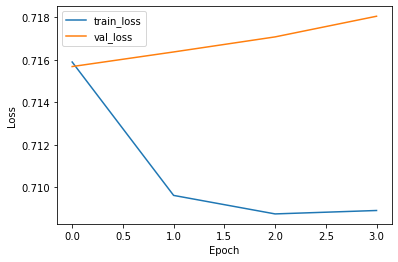

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 493ms/step - accuracy: 0.4602 - auc_64: 0.5000 - auc_65: 0.5398 - false_negatives_32: 71.0000 - false_positives_32: 0.0000e+00 - loss: 0.7350 - precision_32: 0.0000e+00 - recall_32: 0.0000e+00 - true_negatives_32: 63.0000 - true_positives_32: 0.0000e+00
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 617ms/step
Model Details:
Model: ResNet50+GRU+DENSE
Epochs: 4
Test Accuracy: 0.47999998927116394
Test Loss: 0.715685248374939
Validation Accuracy: 0.47999998927116394
Validation Loss: 0.7180547714233398
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
AUC-PR: 0.0
True Negatives: 96.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 0.0
Error Rate: 0.0
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 104.45053052902222


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


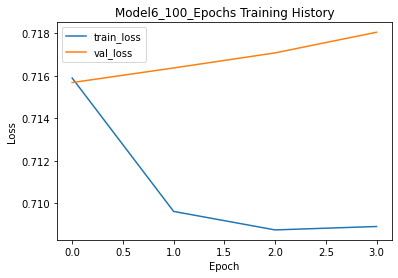

In [41]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained ResNet50 model without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    resnet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'ResNet50+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("Model6(100)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model6_100_Epochs Training History")
plt.show()


# resnet50+Attention Mechanism+Dense Layers

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,786,113 (106.00 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 777ms/step - accuracy: 0.4916 - loss: 0.6932 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 780ms/step - accuracy: 0.4944 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6928
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 781ms/step - accuracy: 0.5191 - loss: 0.6925 - val_accuracy: 0.4800 - val_loss: 0.6925
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 783ms/step - accuracy: 0.5109 - loss: 0.6922 - val_accuracy: 0.4800 - val_loss: 0.6920
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.4836 - loss: 0.6920 - val_accuracy: 0.4800 - val_loss: 0.6915
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 771ms/step - accuracy: 0.4873 - loss: 0.6908 - val_accuracy: 0.4800 - val_loss: 0.6888
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 774ms/step - accuracy: 0.5197 - loss: 0.6870 - val_accuracy: 0.4800 - val_loss: 0.6871
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 765ms/step - accuracy: 0.5156 - loss: 0.6863 - val_accu

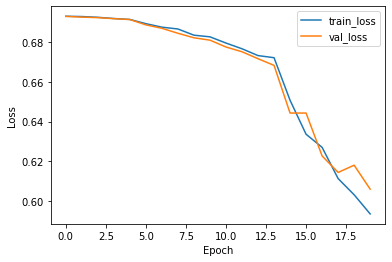

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.7743 - loss: 0.5924
Test Accuracy: 72.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step
Confusion Matrix:
[[78 18]
 [37 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        96
           1       0.79      0.64      0.71       104

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200

AUC Score: 0.73

Precision: 0.788235294117647
Recall: 0.6442307692307693
F1 Score: 0.708994708994709
Cohen's Kappa Coefficient: 0.4532803180914513
Matthews Correlation Coefficient (MCC): 0.4615876424711536
Balanced Accuracy: 0.7283653846153846
Time taken: 393.95 seconds


In [10]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention_resnet50.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention_resnet50.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['ResNet50_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(20).csv', index=False)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,786,113 (106.00 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 794ms/step - accuracy: 0.4663 - loss: 0.6932 - val_accuracy: 0.4800 - val_loss: 0.6930
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 765ms/step - accuracy: 0.4999 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6922
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 765ms/step - accuracy: 0.5087 - loss: 0.6919 - val_accuracy: 0.4800 - val_loss: 0.6919
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.5047 - loss: 0.6916 - val_accuracy: 0.4800 - val_loss: 0.6903
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.5446 - loss: 0.6893 - val_accuracy: 0.4800 - val_loss: 0.6865
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.5627 - loss: 0.6844 - val_accuracy: 0.6450 - val_loss: 0.6762
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.5915 - loss: 0.6780 - val_accuracy: 0.7050 - val_loss: 0.6613
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.6941 - loss: 0.6538 - val_accu

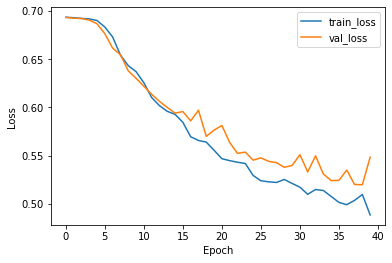

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - accuracy: 0.7896 - loss: 0.4900
Test Accuracy: 75.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 564ms/step
Confusion Matrix:
[[76 20]
 [29 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        96
           1       0.79      0.72      0.75       104

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

AUC Score: 0.76

Precision: 0.7894736842105263
Recall: 0.7211538461538461
F1 Score: 0.7537688442211055
Cohen's Kappa Coefficient: 0.5109780439121756
Matthews Correlation Coefficient (MCC): 0.5130518082601406
Balanced Accuracy: 0.7564102564102564
Time taken: 772.48 seconds


In [11]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention_resnet50.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention_resnet50.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['ResNet50_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(40).csv', index=False)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,786,113 (106.00 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 793ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.4800 - val_loss: 0.6930
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.5213 - loss: 0.6928 - val_accuracy: 0.4800 - val_loss: 0.6911
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.4856 - loss: 0.6917 - val_accuracy: 0.4800 - val_loss: 0.6890
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.4867 - loss: 0.6911 - val_accuracy: 0.4800 - val_loss: 0.6828
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - accuracy: 0.5271 - loss: 0.6823 - val_accuracy: 0.4800 - val_loss: 0.6720
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 770ms/step - accuracy: 0.5489 - loss: 0.6842 - val_accuracy: 0.7150 - val_loss: 0.6630
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.6760 - loss: 0.6567 - val_accuracy: 0.6600 - val_loss: 0.6475
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 765ms/step - accuracy: 0.6664 - loss: 0.6426 - val_accu

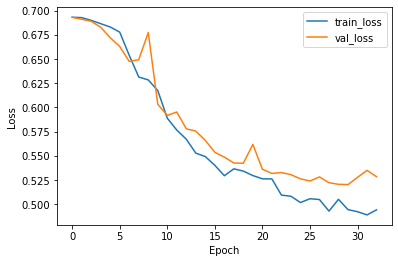

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.7849 - loss: 0.4809
Test Accuracy: 74.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 569ms/step
Confusion Matrix:
[[69 27]
 [25 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        96
           1       0.75      0.76      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

AUC Score: 0.74

Precision: 0.7452830188679245
Recall: 0.7596153846153846
F1 Score: 0.7523809523809523
Cohen's Kappa Coefficient: 0.4787489975942262
Matthews Correlation Coefficient (MCC): 0.478845237664729
Balanced Accuracy: 0.7391826923076923
Time taken: 642.32 seconds


In [12]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention_resnet50.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention_resnet50.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['ResNet50_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(60).csv', index=False)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,786,113 (106.00 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - accuracy: 0.5244 - loss: 0.6932 - val_accuracy: 0.5200 - val_loss: 0.6932
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5417 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6929
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5052 - loss: 0.6926 - val_accuracy: 0.4800 - val_loss: 0.6902
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 769ms/step - accuracy: 0.4860 - loss: 0.6913 - val_accuracy: 0.4800 - val_loss: 0.6884
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.4897 - loss: 0.6903 - val_accuracy: 0.4900 - val_loss: 0.6831
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 768ms/step - accuracy: 0.6097 - loss: 0.6775 - val_accuracy: 0.6700 - val_loss: 0.6668
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.6485 - loss: 0.6625 - val_accuracy: 0.4800 - val_loss: 0.6762
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5894 - loss: 0.6628 - val_accu

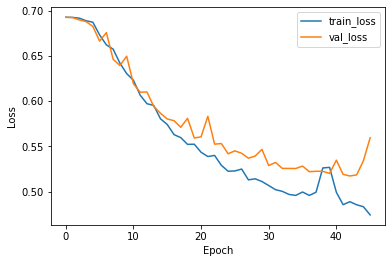

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.7849 - loss: 0.4761
Test Accuracy: 74.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step
Confusion Matrix:
[[69 27]
 [25 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        96
           1       0.75      0.76      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

AUC Score: 0.74

Precision: 0.7452830188679245
Recall: 0.7596153846153846
F1 Score: 0.7523809523809523
Cohen's Kappa Coefficient: 0.4787489975942262
Matthews Correlation Coefficient (MCC): 0.478845237664729
Balanced Accuracy: 0.7391826923076923
Time taken: 890.45 seconds


In [13]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention_resnet50.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention_resnet50.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['ResNet50_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(80).csv', index=False)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,786,113 (106.00 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - accuracy: 0.4880 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6930
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5180 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6924
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.5038 - loss: 0.6924 - val_accuracy: 0.4800 - val_loss: 0.6911
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5032 - loss: 0.6911 - val_accuracy: 0.4800 - val_loss: 0.6888
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.5313 - loss: 0.6871 - val_accuracy: 0.5200 - val_loss: 0.7027
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.5302 - loss: 0.6907 - val_accuracy: 0.5600 - val_loss: 0.6811
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 768ms/step - accuracy: 0.5681 - loss: 0.6778 - val_accuracy: 0.4800 - val_loss: 0.6809
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 766ms/step - accuracy: 0.5439 - loss: 0.6779 - 

25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.7939 - loss: 0.4741 - val_accuracy: 0.7150 - val_loss: 0.5185
Epoch 51/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 769ms/step - accuracy: 0.7620 - loss: 0.4845 - val_accuracy: 0.7450 - val_loss: 0.5153
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 767ms/step - accuracy: 0.7659 - loss: 0.4760 - val_accuracy: 0.7500 - val_loss: 0.5127
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 780ms/step - accuracy: 0.7828 - loss: 0.4695 - val_accuracy: 0.7550 - val_loss: 0.5130
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 769ms/step - accuracy: 0.7560 - loss: 0.4812 - val_accuracy: 0.7150 - val_loss: 0.5157
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 763ms/step - accuracy: 0.7719 - loss: 0.4891 - val_accuracy: 0.7400 - val_loss: 0.5195
Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 52.


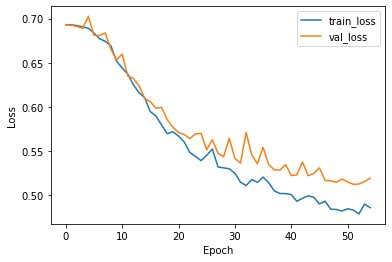

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.7879 - loss: 0.4784
Test Accuracy: 75.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 609ms/step
Confusion Matrix:
[[74 22]
 [28 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        96
           1       0.78      0.73      0.75       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

AUC Score: 0.75

Precision: 0.7755102040816326
Recall: 0.7307692307692307
F1 Score: 0.7524752475247524
Cohen's Kappa Coefficient: 0.5003996802557953
Matthews Correlation Coefficient (MCC): 0.5013013917162995
Balanced Accuracy: 0.750801282051282
Time taken: 1062.05 seconds


In [14]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention_resnet50.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention_resnet50.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['ResNet50_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('metrics7(100).csv', index=False)


# Resnet50+Capsule Network+Dense Layers

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_73      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_73[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,870,625 (91.06 MB)

 Trainable params: 23,817,505 (90.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7344 - loss: 0.5689 - val_accuracy: 0.5200 - val_loss: 0.8685
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8492 - loss: 0.4351 - val_accuracy: 0.5200 - val_loss: 0.9883
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8197 - loss: 0.4394 - val_accuracy: 0.5200 - val_loss: 0.9594
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8760 - loss: 0.3620 - val_accuracy: 0.5200 - val_loss: 0.9978
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


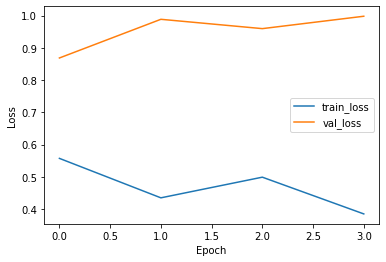

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.5398 - loss: 0.8195
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step
Model Details:
Model: ResNet50 + Capsule Network + Dense
Epochs: 4
Test Accuracy: 0.5199999809265137
Test Loss: 0.8685114979743958
Validation Accuracy: 0.5199999809265137
Validation Loss: 0.9978142976760864
Precision: 0.52
Recall: 1.0
AUC-ROC: 0.5
True Negatives: 0
False Positives: 96
False Negatives: 0
True Positives: 104
Error Rate: 0.48000001907348633
F1 Score: 0.6842105263157895
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 300.66029167175293


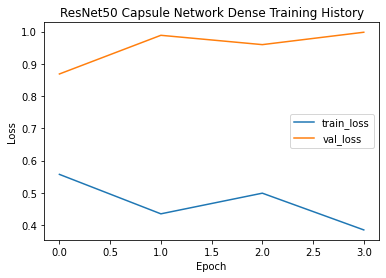

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'ResNet50 + Capsule Network + Dense',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("RESNET50_Model8(20).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Capsule Network Dense Training History")
plt.show()



Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_74      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_74[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,870,625 (91.06 MB)

 Trainable params: 23,817,505 (90.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7362 - loss: 0.5654 - val_accuracy: 0.5200 - val_loss: 0.7088
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8582 - loss: 0.4159 - val_accuracy: 0.5200 - val_loss: 1.0003
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8433 - loss: 0.4223 - val_accuracy: 0.5200 - val_loss: 1.0723
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8902 - loss: 0.3260 - val_accuracy: 0.5200 - val_loss: 1.1093
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


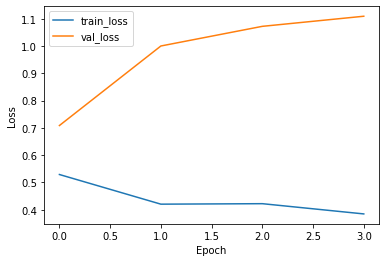

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.5398 - loss: 0.6955
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 572ms/step
Model Details:
Model: ResNet50 + Capsule Network + Dense
Epochs: 4
Test Accuracy: 0.5199999809265137
Test Loss: 0.7087635397911072
Validation Accuracy: 0.5199999809265137
Validation Loss: 1.1093465089797974
Precision: 0.52
Recall: 1.0
AUC-ROC: 0.5
True Negatives: 0
False Positives: 96
False Negatives: 0
True Positives: 104
Error Rate: 0.48000001907348633
F1 Score: 0.6842105263157895
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 294.299441576004


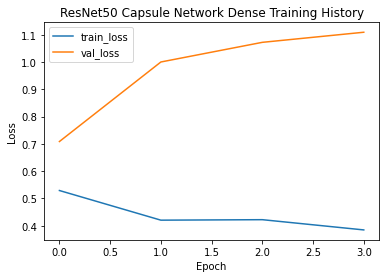

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'ResNet50 + Capsule Network + Dense',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("RESNET50_Model8(40).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Capsule Network Dense Training History")
plt.show()



Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_75      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_75[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,870,625 (91.06 MB)

 Trainable params: 23,817,505 (90.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7212 - loss: 0.5785 - val_accuracy: 0.4800 - val_loss: 0.8763
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8198 - loss: 0.4425 - val_accuracy: 0.5200 - val_loss: 0.9697
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8632 - loss: 0.3937 - val_accuracy: 0.4800 - val_loss: 0.8739
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8643 - loss: 0.3692 - val_accuracy: 0.5200 - val_loss: 1.0163
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8760 - loss: 0.3377 - val_accuracy: 0.5200 - val_loss: 1.1576
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8956 - loss: 0.2973 - val_accuracy: 0.5200 - val_loss: 1.1820
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


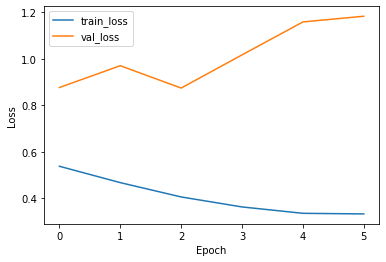

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.4602 - loss: 0.9270
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 729ms/step
Model Details:
Model: ResNet50 + Capsule Network + Dense
Epochs: 6
Test Accuracy: 0.47999998927116394
Test Loss: 0.8738788962364197
Validation Accuracy: 0.5199999809265137
Validation Loss: 1.1820136308670044
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.5
True Negatives: 96
False Positives: 0
False Negatives: 104
True Positives: 0
Error Rate: 0.5200000107288361
F1 Score: 0.0
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 429.08351850509644


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


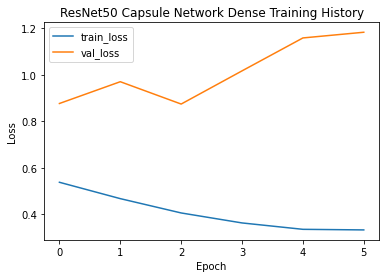

In [51]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'ResNet50 + Capsule Network + Dense',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("RESNET50_Model8(60).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Capsule Network Dense Training History")
plt.show()



Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_76      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_76[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,870,625 (91.06 MB)

 Trainable params: 23,817,505 (90.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7445 - loss: 0.5739 - val_accuracy: 0.5200 - val_loss: 0.9180
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8198 - loss: 0.4656 - val_accuracy: 0.5200 - val_loss: 0.9841
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8584 - loss: 0.4210 - val_accuracy: 0.4800 - val_loss: 0.9218
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8621 - loss: 0.3795 - val_accuracy: 0.4800 - val_loss: 0.8828
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8698 - loss: 0.3470 - val_accuracy: 0.5200 - val_loss: 1.1534
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9262 - loss: 0.2692 - val_accuracy: 0.4350 - val_loss: 0.7607
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9156 - loss: 0.2697 - val_accuracy: 0.5200 - val_loss: 1.2885
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9108 - loss: 0.2581 - val_accuracy: 0.5200 - val_loss:

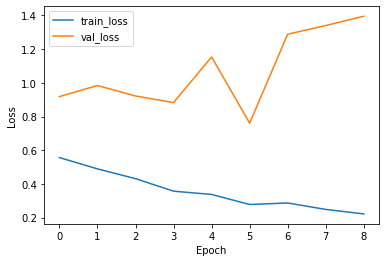

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.4033 - loss: 0.7651
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step
Model Details:
Model: ResNet50 + Capsule Network + Dense
Epochs: 9
Test Accuracy: 0.4350000023841858
Test Loss: 0.7606536149978638
Validation Accuracy: 0.5199999809265137
Validation Loss: 1.394877552986145
Precision: 0.45714285714285713
Recall: 0.46153846153846156
AUC-ROC: 0.4338942307692308
True Negatives: 39
False Positives: 57
False Negatives: 56
True Positives: 48
Error Rate: 0.5649999976158142
F1 Score: 0.4593301435406698
Cohen's Kappa: -0.13226452905811636
Matthews Correlation Coefficient: -0.1322711693170675
Balanced Accuracy: 0.4338942307692308
Time Taken (seconds): 630.5832786560059


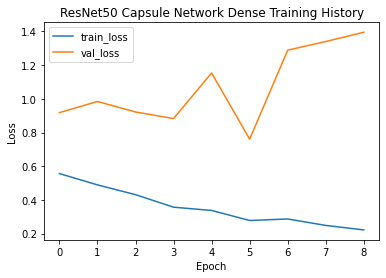

In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'ResNet50 + Capsule Network + Dense',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("RESNET50_Model8(80).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Capsule Network Dense Training History")
plt.show()



Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_77      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_77[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,870,625 (91.06 MB)

 Trainable params: 23,817,505 (90.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7528 - loss: 0.5661 - val_accuracy: 0.5200 - val_loss: 0.8301
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.7997 - loss: 0.4927 - val_accuracy: 0.5200 - val_loss: 0.6971
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8469 - loss: 0.4108 - val_accuracy: 0.4800 - val_loss: 0.9893
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8813 - loss: 0.3435 - val_accuracy: 0.4800 - val_loss: 1.0426
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8874 - loss: 0.3259 - val_accuracy: 0.5200 - val_loss: 1.0949
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


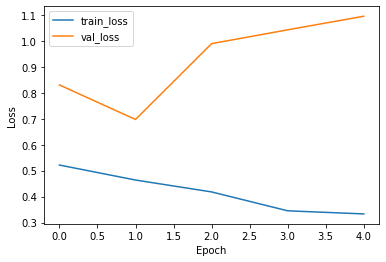

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.5398 - loss: 0.6909
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 575ms/step
Model Details:
Model: ResNet50 + Capsule Network + Dense
Epochs: 5
Test Accuracy: 0.5199999809265137
Test Loss: 0.6970893740653992
Validation Accuracy: 0.5199999809265137
Validation Loss: 1.0949029922485352
Precision: 0.52
Recall: 1.0
AUC-ROC: 0.5
True Negatives: 0
False Positives: 96
False Negatives: 0
True Positives: 104
Error Rate: 0.48000001907348633
F1 Score: 0.6842105263157895
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: 0.0
Balanced Accuracy: 0.5
Time Taken (seconds): 361.0471365451813


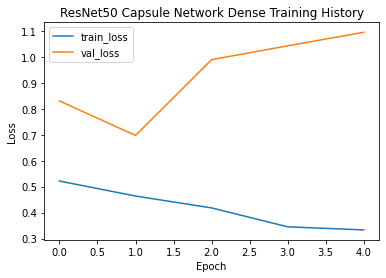

In [53]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of ResNet50

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load ResNet50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'ResNet50 + Capsule Network + Dense',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("RESNET50_Model8(100).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Capsule Network Dense Training History")
plt.show()

